# Metropolis Hasting - Model of Covariation

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 20 , 10

## [Model of covariation](http://www.mit.edu/~ilkery/papers/MetropolisHastingsSampling.pdf)

We have two random variables $x_{1:N}$ and $y_{1:N}$. We are interested in modeling their correlation $\rho$ using a bivariate gaussian distribution.

- $E(x) = 0$ and $E(y)= 0$
- $Var(x) = 1$ and $Var(y) = 1$
- $\Sigma = \begin{bmatrix}
    \sigma_{xx}       & \rho \\
    \rho       & \sigma_{yy} 
   \end{bmatrix}$

### Synthetic Data Generation

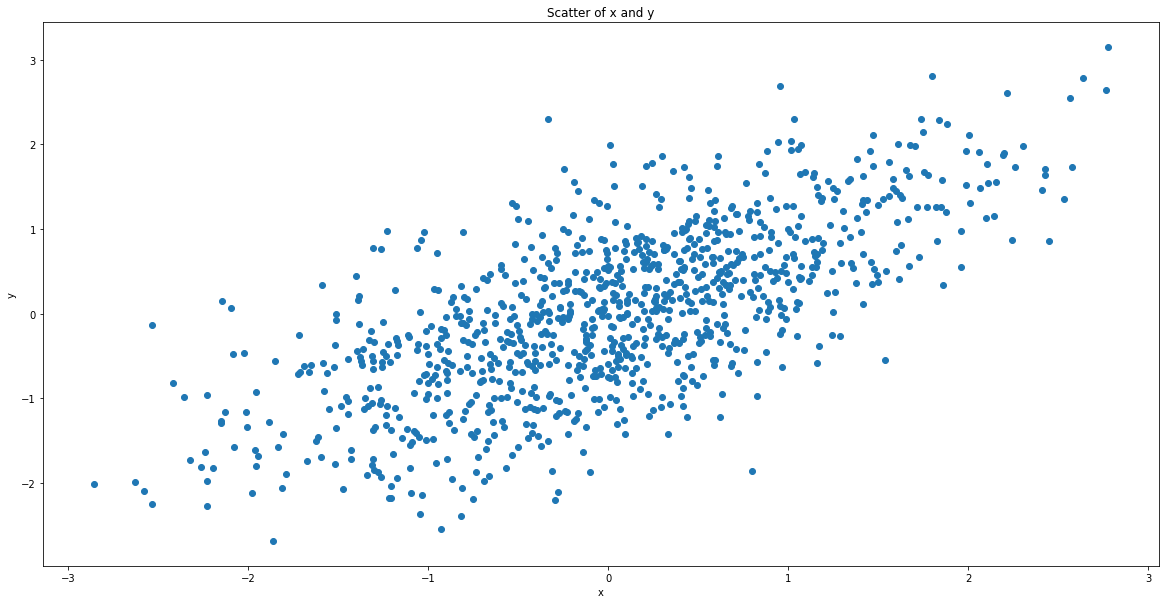

In [23]:
# As per the assumption mean 0, sd 1 and rho 0.7 is used to generate data
np.random.seed(13)
mu = [0,0]
cov = [[1, 0.7],[0.7,1]]

d = np.random.multivariate_normal(mu, cov, 1000)
x = d[:,0]
y = d[:,1]

plt.scatter(x,y)
plt.title("Scatter of x and y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [24]:
# sum of x, y and xy
sum_x = np.sum(x**2)
sum_y = np.sum(y**2)
sum_xy = np.sum(x*y)
n = 1000

def postdensity(rho):
    ''' Evaluates the posterior of rho for new candidate values '''
    if rho == 1:
        raise ValueError("rho cannot be 1")
    global sum_x, sum_y, sum_xy, n
    f = (-3.0/2 - n/2.0) * np.log(1-(rho**2))
    den = -(2*(1-rho**2))
    num = sum_x + sum_y - 2*rho*sum_xy
    fin = f + num/den 
    return fin

In [25]:
# MH algorithm
chain_size = 10000
rho_chain = np.array([0.0]*chain_size)
rho = 0.1
for i in range(chain_size):
    rho_cand = np.random.uniform(rho-0.07, rho+0.07)
    rat = postdensity(rho_cand)-postdensity(rho)
    alpha = np.min([0,rat])
    alpha = np.exp(alpha)
    u = np.random.uniform(0,1)
    if alpha > u:
        rho = rho_cand
    else:
        rho = rho
    rho_chain[i] = rho    

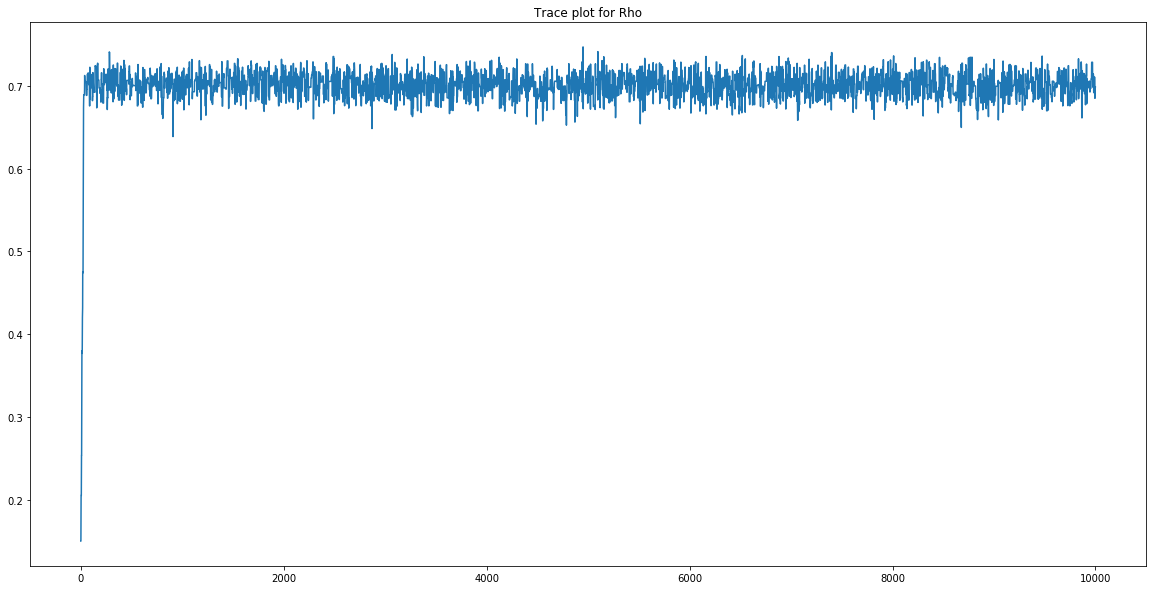

In [26]:
# trace plot
plt.plot(rho_chain)
plt.title("Trace plot for Rho")
plt.show()

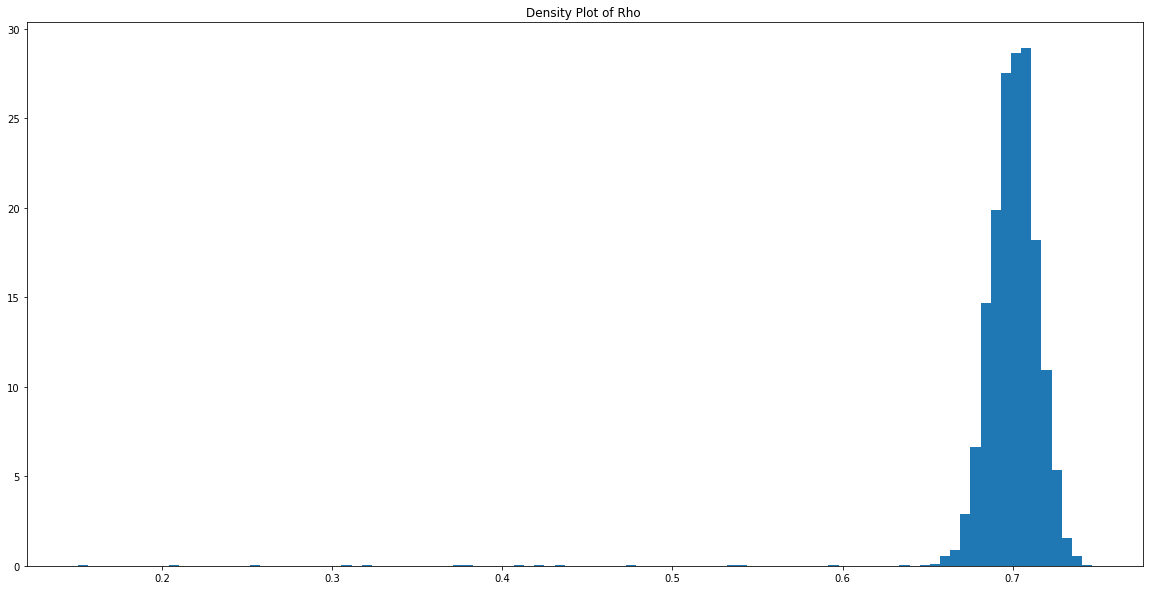

In [30]:
# Density plot of rho
plt.hist(rho_chain,100, density=True)
plt.title("Density Plot of Rho ")
plt.show()